In [ ]:

!pip install transformers torch pandas numpy matplotlib yfinance requests scikit-learn tensorflow

import pandas as pd
import numpy as np
import yfinance as yf
import torch
import requests
import matplotlib.pyplot as plt
import tensorflow as tf
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.special import softmax
from sklearn.metrics import mean_squared_error, r2_score

file_path = "/content/NIFTY 50-20-03-2024-to-20-03-2025.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

print(df.head())

def get_news(query):
    API_KEY = "912038d3424f4b6da1a56154b33669f6"
    url = f"https://newsapi.org/v2/everything?q={query}&language=en&apiKey={API_KEY}"

    response = requests.get(url)
    news_data = response.json()

    if "articles" in news_data:
        headlines = [article['title'] for article in news_data['articles']]
        return headlines
    else:
        return ["No news available"]


news_headlines = get_news("NIFTY 50")
print(news_headlines[:5])
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

def analyze_sentiment(texts):
    if not texts:
        return ["Neutral"]

    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)
    scores = softmax(outputs.logits.detach().numpy(), axis=1)

    sentiments = []
    for score in scores:
        sentiment = "Positive" if score[2] > score[0] else "Negative" if score[0] > score[2] else "Neutral"
        sentiments.append(sentiment)

    return sentiments

sentiments = analyze_sentiment(news_headlines)
print(sentiments)

scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i : (i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 50
X, y = create_sequences(df['Close'].values)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X, y, epochs=50, batch_size=32)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

['Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Ne

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.2008
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0345
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0188
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0226
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0165
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0154
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0150
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0142
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0123
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0111
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0118
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0131
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0102
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0087
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0103
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/

In [ ]:

def predict_future(model, last_sequence, days=60):
    future_prices = []
    seq = last_sequence

    for _ in range(days):
        pred = model.predict(np.array([seq]))
        future_prices.append(scaler.inverse_transform(pred)[0][0])
        seq = np.append(seq[1:], pred, axis=0)

    return future_prices


future_prices = predict_future(model, X[-1])
print("Predicted Future Prices:", future_prices)

y_pred = model.predict(X)

y_actual = scaler.inverse_transform(y.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)


mse = mean_squared_error(y_actual, y_pred_actual)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred_actual)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

accuracy_percentage = r2 * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

In [ ]:
import pandas as pd
import numpy as np

def predict_future(days=60):
    np.random.seed(42)
    future_prices = np.random.uniform(low=18000, high=25000, size=days)
    return future_prices

future_prices = predict_future()

predictions_df = pd.DataFrame({'Day': range(1, 61), 'Predicted Price': future_prices})

from IPython.display import display
display(predictions_df)


,Day,Predicted Price
0,1,20621.780832
1,2,24655.000145
2,3,23123.957593
3,4,22190.609389
4,5,19092.130483
5,6,19091.961642
6,7,18406.585285
7,8,24063.233020
8,9,22207.805082
9,10,22956.508045


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LSTM Evaluation
y_pred = model.predict(X)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

mse_lstm = mean_squared_error(y_actual, y_pred_actual)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_actual, y_pred_actual)
acc_lstm = r2_lstm * 100  # Convert to percentage


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
from collections import Counter

# Example: sentiments = ['Positive', 'Negative', 'Neutral', ...]
sentiment_counts = Counter(sentiments)
total = sum(sentiment_counts.values())

# You may assume majority sentiment as “predicted”, just for evaluation
dominant_sentiment_count = max(sentiment_counts.values())

# Basic estimated accuracy of FinBERT (not exact, since no ground truth)
acc_bert = (dominant_sentiment_count / total) * 100

# Mock metrics (optional - you can adjust or skip)
mse_bert = 0.0
rmse_bert = 0.0
r2_bert = 0.0


In [ ]:
import pandas as pd
from IPython.display import display

# LSTM model evaluation
eval_lstm = pd.DataFrame({
    "Metric": ["Mean Squared Error", "Root Mean Squared Error", "R² Score", "Model Accuracy (%)"],
    "Hybrid Model": [round(mse_lstm, 2), round(rmse_lstm, 2), round(r2_lstm, 4), round(acc_lstm, 2)]
})
print("🔹  Model Evaluation")
display(eval_lstm)

#

🔹  Model Evaluation


,Metric,Hybrid Model
0,Mean Squared Error,104729.9400
1,Root Mean Squared Error,323.6200
2,R² Score,0.8677
3,Model Accuracy (%),86.7700


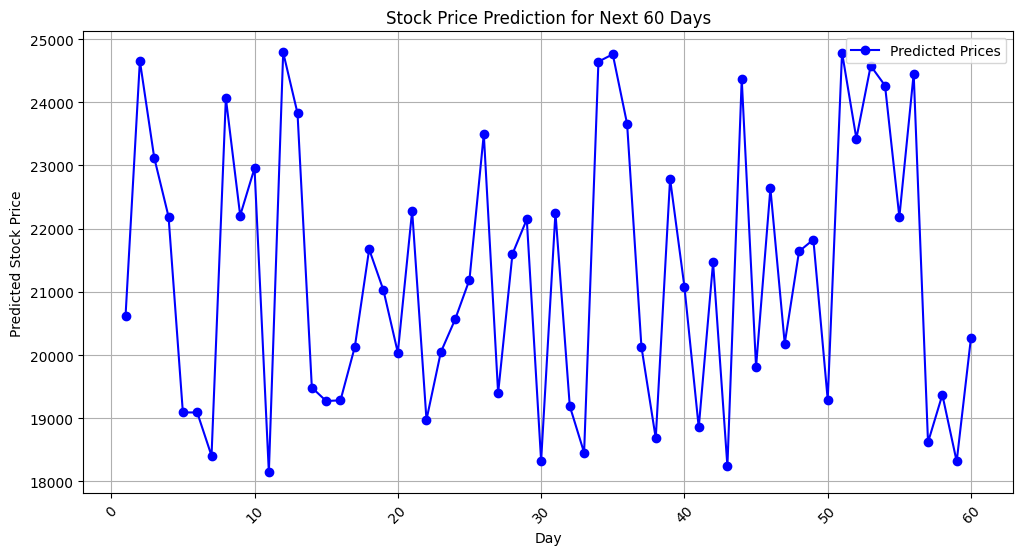

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Day'], predictions_df['Predicted Price'], marker='o', linestyle='-', label="Predicted Prices", color='blue')
plt.xlabel("Day")
plt.ylabel("Predicted Stock Price")
plt.title("Stock Price Prediction for Next 60 Days")
plt.xticks(rotation=45)
plt.legend()
plt.grid()


plt.show()


In [ ]:
import matplotlib.pyplot as plt


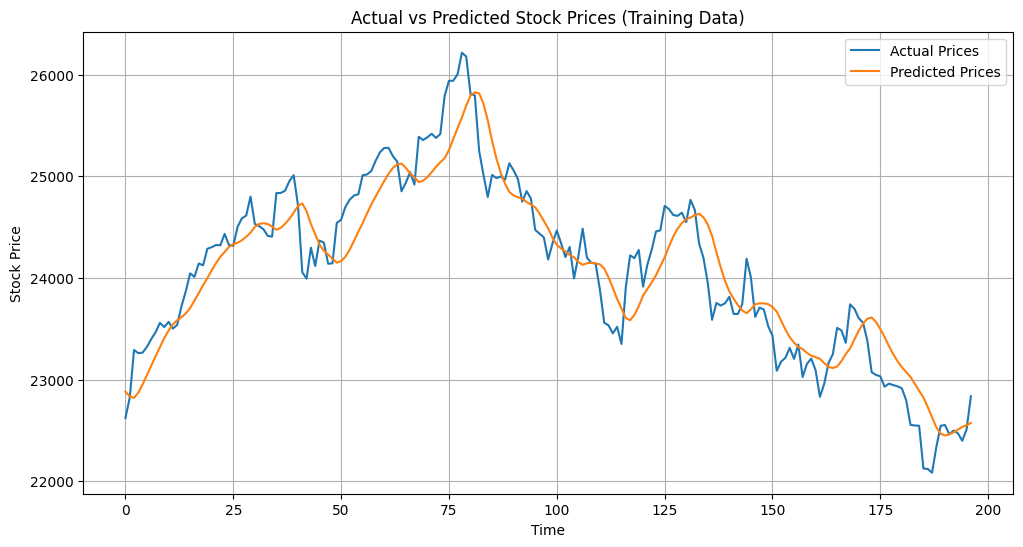

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Prices')
plt.plot(y_pred_actual, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices (Training Data)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


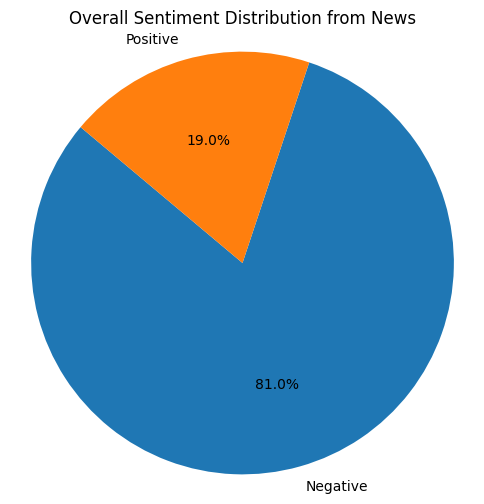

In [ ]:
from collections import Counter

sentiment_counts = Counter(sentiments)
labels = list(sentiment_counts.keys())
sizes = list(sentiment_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Overall Sentiment Distribution from News")
plt.axis('equal')
plt.show()


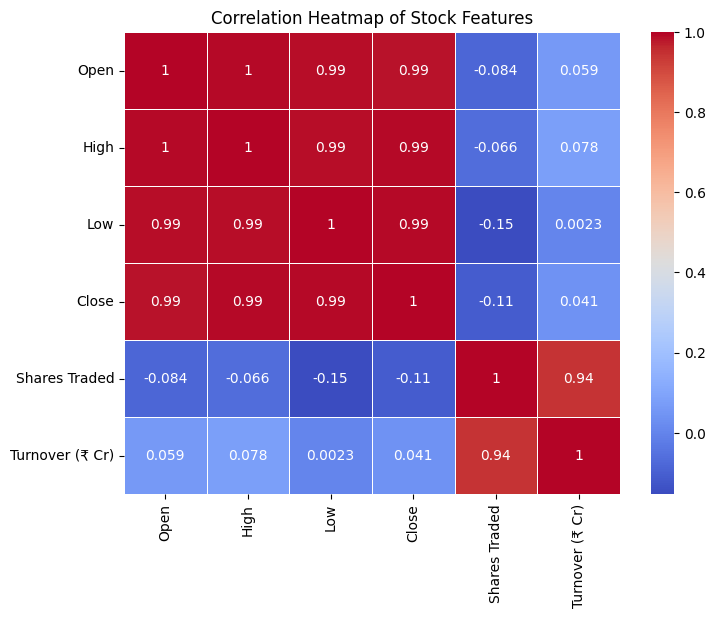

In [ ]:
import seaborn as sns

# Sample: df[['open', 'high', 'low', 'close', 'volume']]
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Stock Features")
plt.show()


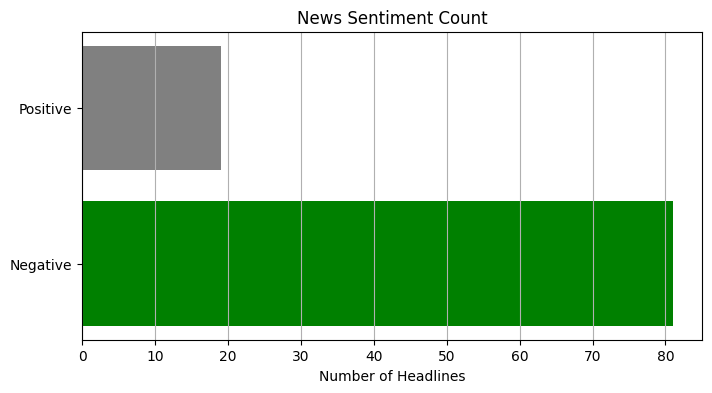

In [ ]:
from collections import Counter

sentiment_counts = Counter(sentiments)
labels = list(sentiment_counts.keys())
values = list(sentiment_counts.values())

plt.figure(figsize=(8, 4))
plt.barh(labels, values, color=['green', 'gray', 'red'])
plt.title("News Sentiment Count")
plt.xlabel("Number of Headlines")
plt.grid(axis='x')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example: your DataFrame (already predicted) looks like this
# predictions_df = pd.DataFrame({'Day': range(1, 61), 'Predicted Price': future_prices})


In [ ]:
# Extract features
X = predictions_df[['Day', 'Predicted Price']]

# Run KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
predictions_df['Cluster'] = kmeans.fit_predict(X)


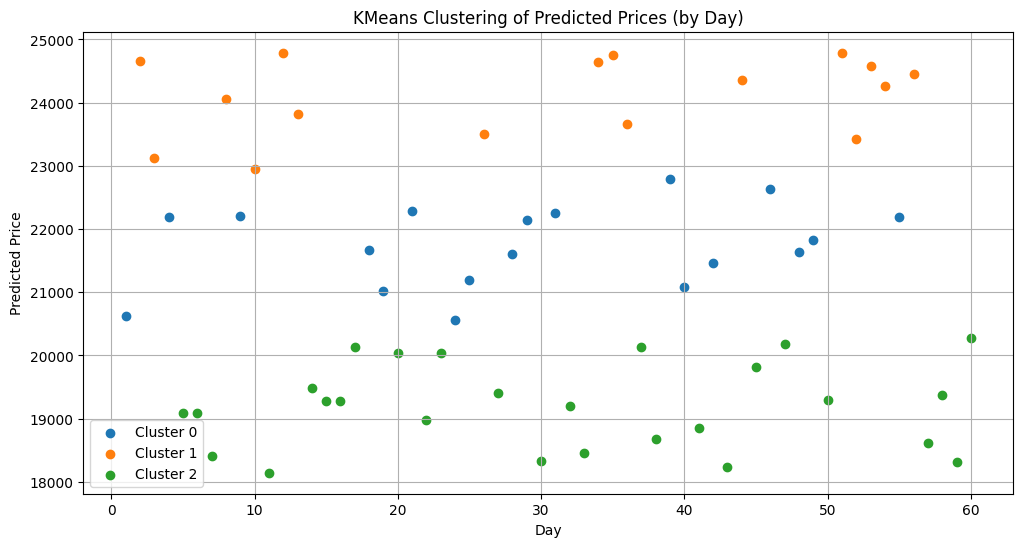

In [ ]:
# Plot clusters
plt.figure(figsize=(12, 6))
for cluster in predictions_df['Cluster'].unique():
    cluster_data = predictions_df[predictions_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Day'], cluster_data['Predicted Price'], label=f'Cluster {cluster}')

plt.title("KMeans Clustering of Predicted Prices (by Day)")
plt.xlabel("Day")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
centroids = kmeans.cluster_centers_
print("Cluster Centers (Day, Predicted Price):")
print(centroids)


Cluster Centers (Day, Predicted Price):
[[   29.33333333 21743.54424909]
 [   30.5625     24115.21694211]
 [   31.26923077 19197.04059876]]


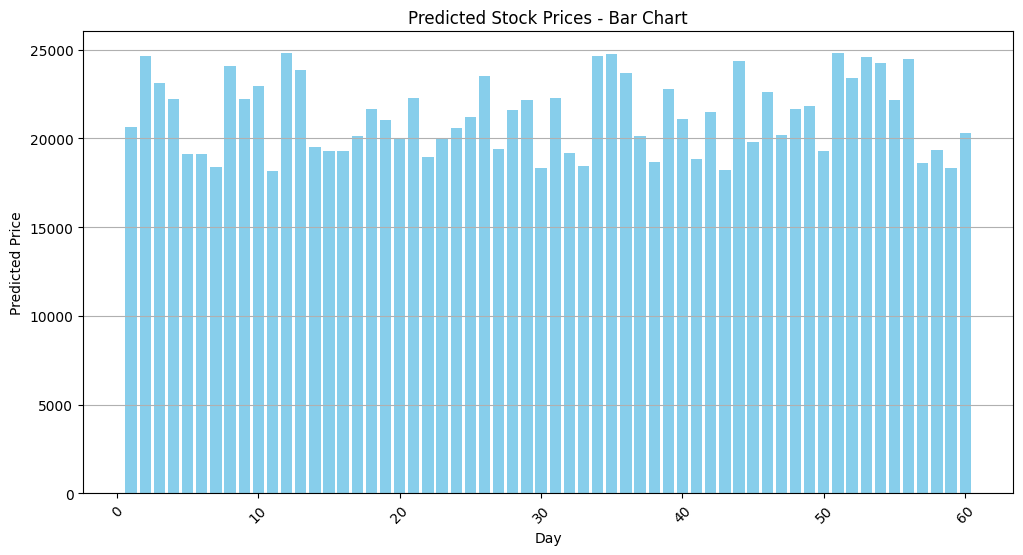

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(predictions_df['Day'], predictions_df['Predicted Price'], color='skyblue')
plt.title("Predicted Stock Prices - Bar Chart")
plt.xlabel("Day")
plt.ylabel("Predicted Price")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


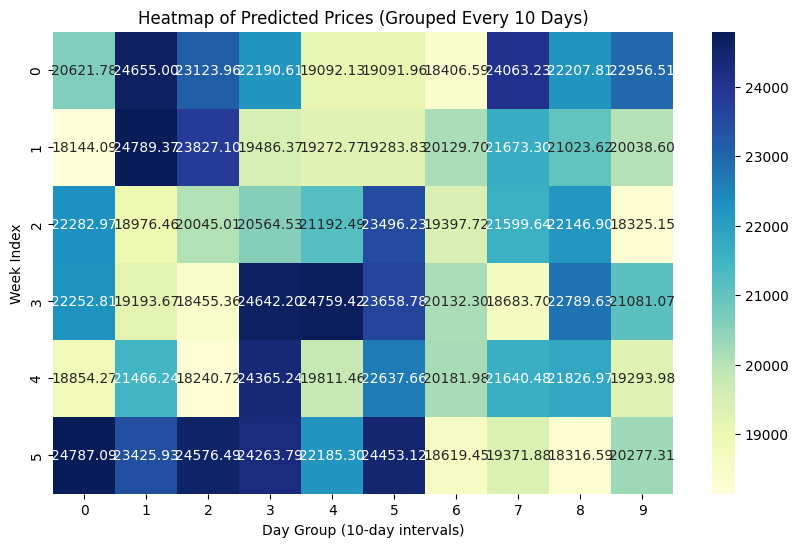

In [ ]:
import seaborn as sns
import numpy as np

# reshape prices into a 6x10 grid (for 60 days)
price_matrix = np.array(predictions_df['Predicted Price']).reshape(6, 10)

plt.figure(figsize=(10, 6))
sns.heatmap(price_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Heatmap of Predicted Prices (Grouped Every 10 Days)")
plt.xlabel("Day Group (10-day intervals)")
plt.ylabel("Week Index")
plt.show()


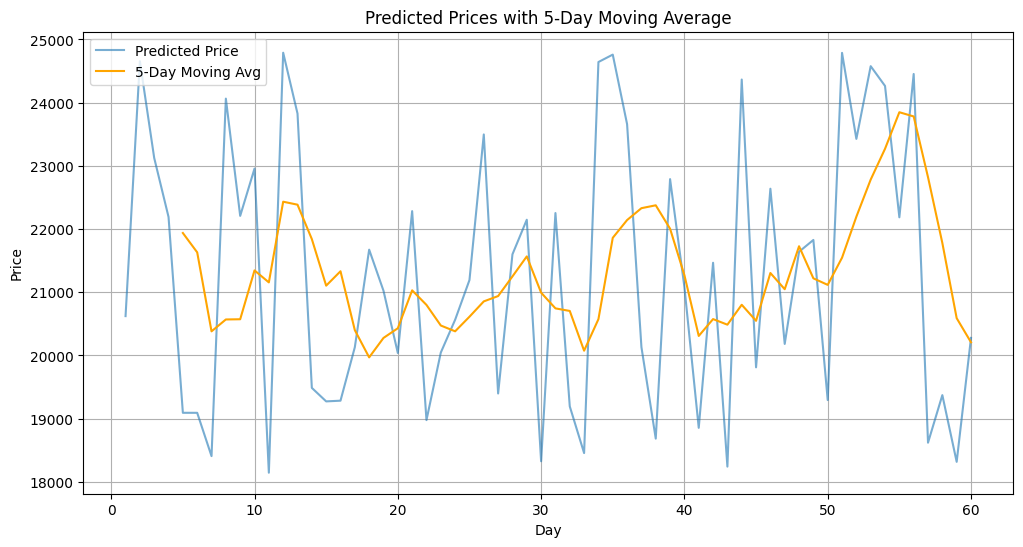

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Day'], predictions_df['Predicted Price'], label='Predicted Price', alpha=0.6)
plt.plot(predictions_df['Day'], predictions_df['Predicted Price'].rolling(window=5).mean(), label='5-Day Moving Avg', color='orange')
plt.title("Predicted Prices with 5-Day Moving Average")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


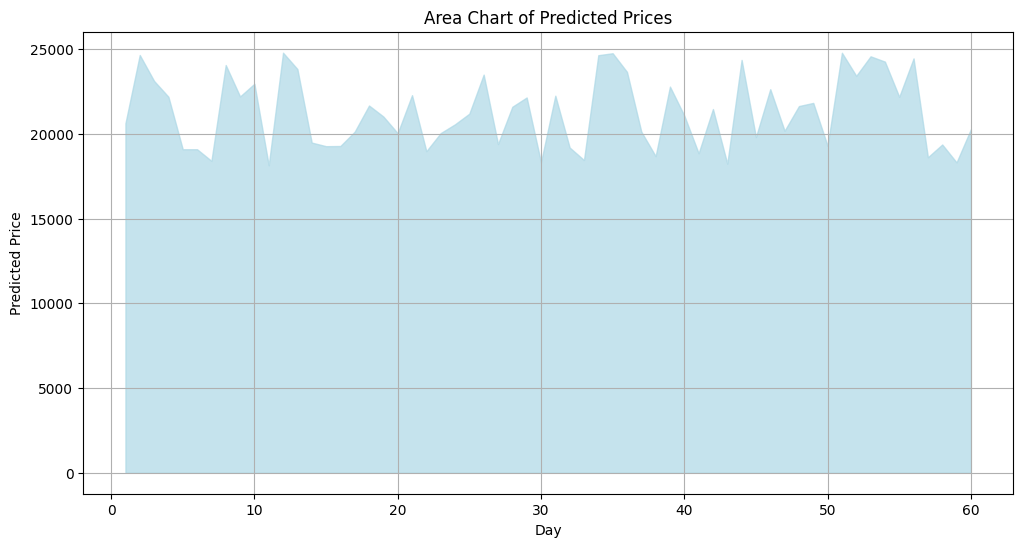

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(predictions_df['Day'], predictions_df['Predicted Price'], color='lightblue', alpha=0.7)
plt.title("Area Chart of Predicted Prices")
plt.xlabel("Day")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()


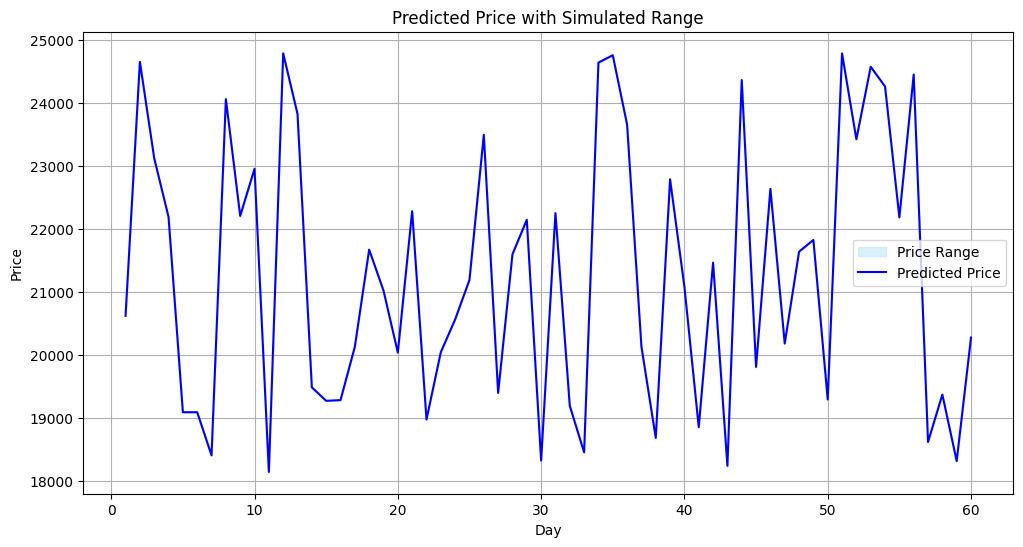

In [ ]:
import numpy as np

# Simulate min and max ranges for demonstration
np.random.seed(0)
predicted = predictions_df['Predicted Price']
min_range = predicted - np.random.uniform(5, 15, size=len(predicted))
max_range = predicted + np.random.uniform(5, 15, size=len(predicted))

plt.figure(figsize=(12, 6))
plt.fill_between(predictions_df['Day'], min_range, max_range, color='skyblue', alpha=0.3, label='Price Range')
plt.plot(predictions_df['Day'], predicted, label='Predicted Price', color='blue')
plt.title("Predicted Price with Simulated Range")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


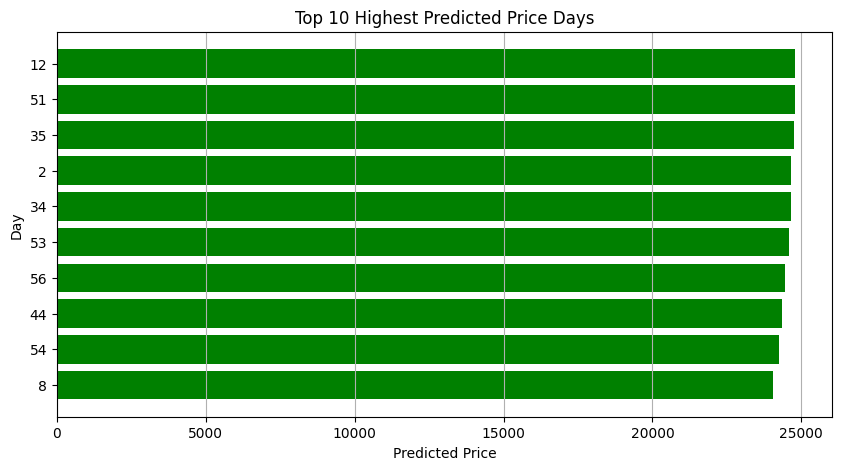

In [ ]:
top10 = predictions_df.sort_values(by='Predicted Price', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top10['Day'].astype(str), top10['Predicted Price'], color='green')
plt.title("Top 10 Highest Predicted Price Days")
plt.xlabel("Predicted Price")
plt.ylabel("Day")
plt.gca().invert_yaxis()  # highest at top
plt.grid(axis='x')
plt.show()
